In [1]:
%matplotlib  inline
import random
import torch
from d2l import torch as d2l

##### **生成数据集**

In [4]:
def synthetic_data(w, b, num_examples):
        X = torch.normal(0, 1, (num_examples, len(w)))                  # 1000个数，均值为0，标准差为1，行数为样本数，列数为特征数
        y = torch.matmul(X, w) + b                                      # y为x*w+b
        y += torch.normal(0, 0.01, y.shape)                             # 误差𝜖均值为0，标准差为0.01，非常接近0 形状和y相同
        return X, y.reshape((-1, 1))                                    # reshape(-1)表示行数由pytorch自己定，列数为1

##### **以下为实验**

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)                 # 线性模型参数 𝐰=[2,−3.4]⊤、 𝑏=4.2

In [9]:
print('features:', features[0], '\nlabel:', labels[0])
print()

features: tensor([-0.3114,  2.1753]) 
label: tensor([-3.8297])


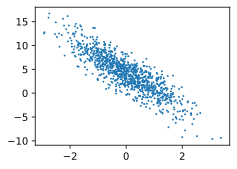

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)    # 画出特征的第一列，和y的图，有相关性，detach分离梯度，转到numpy内绘图

##### **实验结束**
##### **读取数据集**

In [14]:
def data_iter(batch_size, features, labels):        # 打乱数据，进行批量访问
    num_examples = len(features)
    indices = list(range(num_examples))             # 将数据写入列表中
    random.shuffle(indices)                         # shuffle函数打乱这些样本
    for i in range(0, num_examples, batch_size):    #从0到num_examples每次跳batch size个大小
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])      #每次选取batchsize个，如果没拿满就取这两者最小值
        yield features[batch_indices], labels[batch_indices]            #yield就是return一个值，并记住位置，下次从这里开始，

In [16]:
batch_size = 10

for  X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[-0.2933, -1.7437],
        [-0.3722,  1.4220],
        [-1.6067,  1.9121],
        [-1.5172, -0.2987],
        [-0.7878, -1.6005],
        [-2.2042,  0.0247],
        [-0.2229,  0.1719],
        [ 0.7400, -0.2608],
        [ 0.6642,  2.0024],
        [-0.6371, -0.3853]]) 
 tensor([[ 9.5445],
        [-1.3829],
        [-5.4998],
        [ 2.1769],
        [ 8.0710],
        [-0.2956],
        [ 3.1549],
        [ 6.5503],
        [-1.2744],
        [ 4.2100]])


##### **初始化w，b**

In [17]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

##### **定义模型**

In [18]:
def linreg(X, w, b):
    return torch.matmul(X, w) +b

##### **定义损失函数**

In [20]:
def squared(y_hat, y):
    return(y_hat - y.reshape(y_hat.shape)) **2 /2       #将真实值y转变为和预测值相同形状

##### **定义优化算法**